In [213]:
import requests, csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from bs4 import BeautifulSoup

In [214]:
f = open("d1womens.csv", "w")
f.truncate()
f.close()

In [215]:
url = "https://www.ncaa.com/stats/volleyball-women/d1/current/individual/885/p"

In [216]:
for i in range(6) :
    i+=1
    response = requests.get(url + str(i))
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content
        soup = BeautifulSoup(response.content, "html.parser")

        # Extract the data you want
        # Example: Extract all the links on the page
        links = soup.find_all("td")
        for link in links:
            file = open('d1womens.csv', 'a', newline='', encoding='utf-8')
            writer = csv.writer(file)
            writer.writerow([link.get_text()])
            file.close()

    else:
        print("Failed to fetch data from the website.")

In [217]:
csv_file = 'd1womens.csv'

# Read the CSV file, assuming each data point is on a new line
data = pd.read_csv(csv_file, header=None)

# Reshape the data into a table with 8 columns per row
num_columns = 8
reshaped_data = data.values.reshape(-1, num_columns)

# Convert the reshaped data into a DataFrame
df = pd.DataFrame(reshaped_data, columns=[f'Column {i+1}' for i in range(num_columns)])

# Display the table
print(df)

df.to_csv('d1womens.csv', index=False)


    Column 1                  Column 2           Column 3 Column 4 Column 5  \
0          1            Tara Beilsmith  Southeast Mo. St.      Sr.      5-7   
1          2            Hope Matschner               Iona      Sr.     5-10   
2          3                Jada Wills              Drake      Sr.     5-10   
3          4  Christina Martinez Mundo       Eastern Ill.      Sr.      5-4   
4          5            Emily Wichmann            Oakland      Jr.      5-3   
..       ...                       ...                ...      ...      ...   
295      296             Macy Daufeldt              Drake      So.     5-11   
296        -        Hannah Vanden Berg          Green Bay      Sr.      6-2   
297        -            Miëtte Veldman      James Madison      Sr.     5-10   
298      299            Erin Eisenhart       Middle Tenn.      Sr.      5-3   
299        -             Camryn Turner             Kansas      Jr.      5-8   

    Column 6 Column 7 Column 8  
0          L      

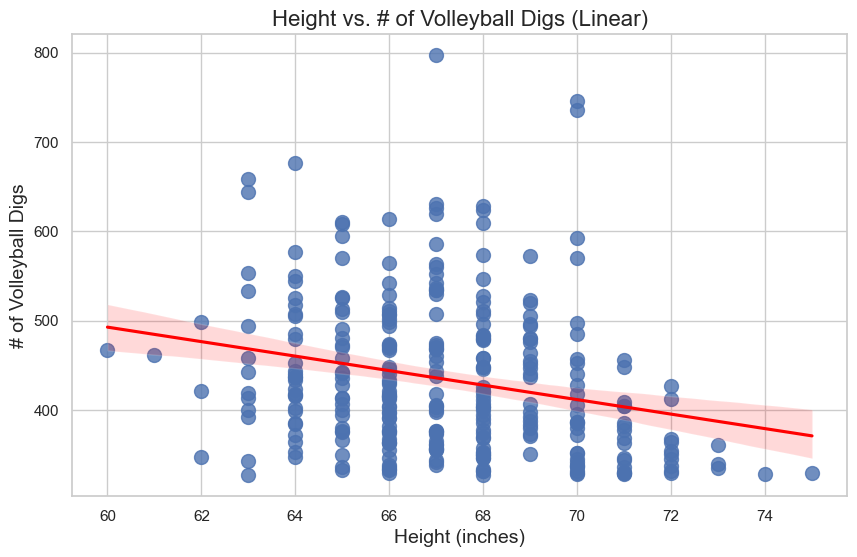

In [218]:
# Function to convert height from "feet-inches" to total inches
def convert_height_to_inches(height):
    try:
        feet, inches = map(int, height.split('-'))
        return feet * 12 + inches
    except ValueError:
        return None  # Return None if there's an issue with conversion

# Apply the conversion to the height column (Column 5)
df['Height (inches)'] = df['Column 5'].apply(convert_height_to_inches)

# Convert 'Column 8' to numeric to ensure it's in the right format
df['Column 8'] = pd.to_numeric(df['Column 8'], errors='coerce')

# Drop rows with invalid or missing height data
df_clean = df.dropna(subset=['Height (inches)', 'Column 8'])

# Sort the cleaned DataFrame by Column 8 (# of Volleyball Digs)
df_sorted = df_clean.sort_values(by='Column 8')

# Plot the sorted data
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create a scatter plot with a line of best fit
sns.regplot(x='Height (inches)', y='Column 8', data=df_sorted, marker='o', color='b', scatter_kws={'s': 100}, line_kws={'color': 'red'})

# Adding labels and title
plt.xlabel('Height (inches)', fontsize=14)
plt.ylabel('# of Volleyball Digs', fontsize=14)
plt.title('Height vs. # of Volleyball Digs (Linear)', fontsize=16)

# Show the plot
plt.show()


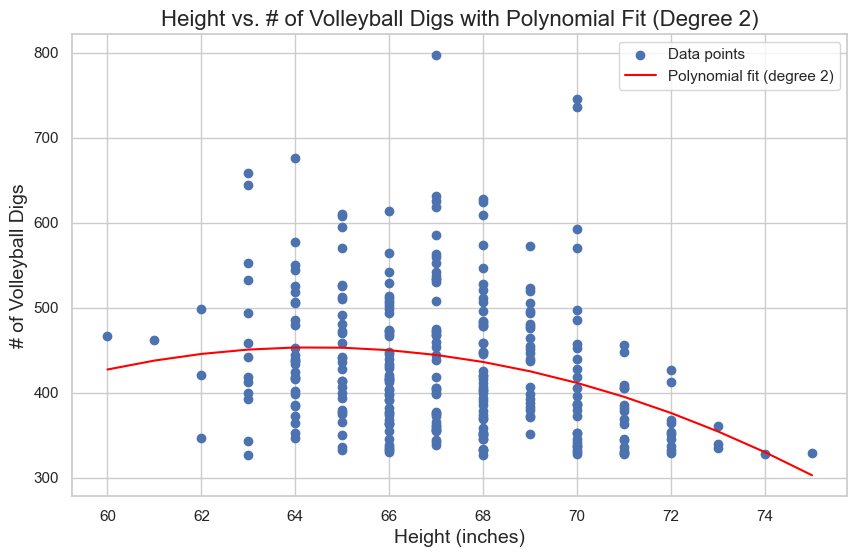

In [219]:
# Assuming 'df_sorted' is your cleaned and sorted DataFrame
X = df_sorted[['Height (inches)']].values
y = df_sorted['Column 8'].values

# Fit a polynomial regression model (degree 2 for quadratic)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# Predict values
y_pred = model.predict(X_poly)

# Sort the data for plotting
sorted_indices = np.argsort(X.flatten())  # Sort by height values
X_sorted = X[sorted_indices]
y_sorted = y[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plot the data and the polynomial fit
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='b', label='Data points')
plt.plot(X_sorted, y_pred_sorted, color='red', label='Polynomial fit (degree 2)')

# Adding labels and title
plt.xlabel('Height (inches)', fontsize=14)
plt.ylabel('# of Volleyball Digs', fontsize=14)
plt.title('Height vs. # of Volleyball Digs with Polynomial Fit (Degree 2)', fontsize=16)
plt.legend()

# Show the plot
plt.show()

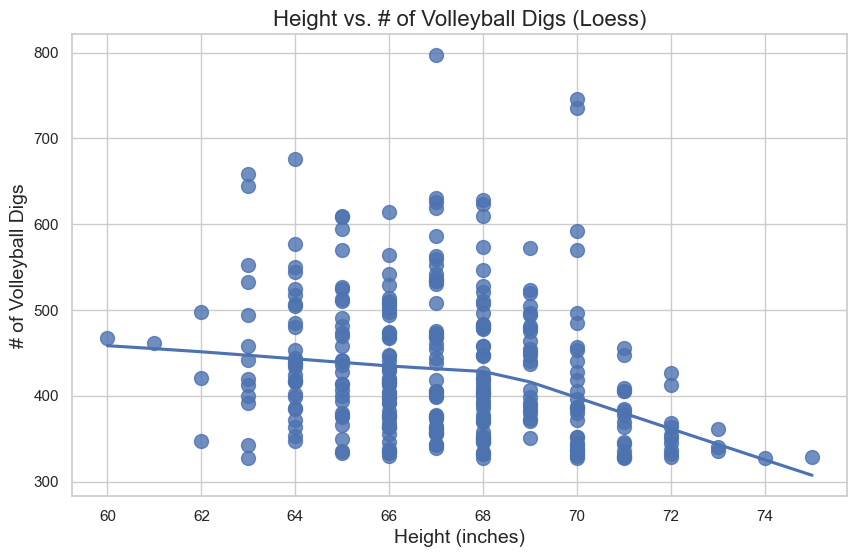

In [220]:
# Plot the sorted data with loess smoothing
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create a scatter plot with loess smoothing
sns.regplot(x='Height (inches)', y='Column 8', data=df_sorted, marker='o', color='b', scatter_kws={'s': 100}, lowess=True)

# Adding labels and title
plt.xlabel('Height (inches)', fontsize=14)
plt.ylabel('# of Volleyball Digs', fontsize=14)
plt.title('Height vs. # of Volleyball Digs (Loess)', fontsize=16)

# Show the plot
plt.show()
